In [1]:
import numpy as np
import os

import matplotlib.pyplot as plt

import matplotlib


OUT_PATH = "./img"
os.makedirs(OUT_PATH, exist_ok=True)

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
mu_cob, std_cob = [], []
mu_sszd, std_sszd = [], []

with open("./result_for_rev1/for_rev1_cobyla.log", 'r') as f:
    for line in f.readlines():
        splitted = line.split(',')
        mu_cob.append(float(splitted[0]))
        std_cob.append(float(splitted[1]))

mu_cob = np.array(mu_cob)
std_cob = np.array(std_cob)

with open("./result_for_rev1/for_rev1_sszd.log", 'r') as f:
    for line in f.readlines():
        splitted = line.split(',')
        mu_sszd.append(float(splitted[0]))
        std_sszd.append(float(splitted[1]))




mu_sszd = np.array(mu_sszd)
std_sszd = np.array(std_sszd)


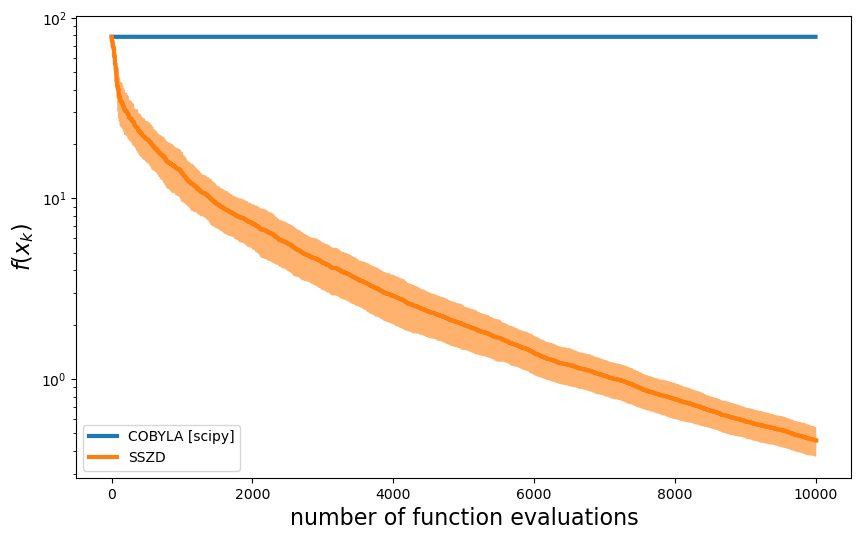

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(range(len(mu_cob)), mu_cob, '-', label='COBYLA [scipy]', lw=3)
ax.fill_between(range(len(mu_cob)), mu_cob - std_cob, mu_cob + std_cob, alpha=0.6)
ax.plot(range(len(mu_sszd)), mu_sszd, '-', label='SSZD', lw=3)
ax.fill_between(range(len(mu_sszd)), mu_sszd - std_sszd, mu_sszd + std_sszd, alpha=0.6)
ax.set_yscale('log')
ax.set_xlabel("number of function evaluations", fontsize=16)
ax.set_ylabel("$f(x_k)$", fontsize=16)
ax.legend()
fig.savefig("./img/cob_vs_sszd_scipy.pdf", bbox_inches='tight')

# Comparison with Direct Search

In [2]:
in_path = "../paper_experiments/synthetic_comparison/strongly_convex/50/"

fpaths = [
    (f"{in_path}/stp.log", "STP"),
    (f"{in_path}/cobyla.log", "COBYLA [scipy]"),
#    (f"{in_path}/sszd_co_25.log", "S-SZD-CO [$l = 25$]"),
#    (f"{in_path}/sszd_co_50.log", "S-SZD-CO [$l = 50$]"),
    (f"{in_path}/sszd_qr_25.log", "S-SZD [$l = 25$]"),
    (f"{in_path}/sszd_qr_50.log", "S-SZD [$l = 50$]"),
    (f"{in_path}/nesterov.log", "FD-G [$l = 1$]"),
    (f"{in_path}/duchi.log", "FD-G [$l = 50$]"),
    (f"{in_path}/flaxman.log", "FD-SP [$l = 1$]"),
    (f"{in_path}/beharas.log", "FD-SP [$l = 50$]"),
    (f"{in_path}/probds_sp_2.log", "ProbDS [$l = 2$]"),
    (f"{in_path}/probds_sketch_ortho_sp_25_2.log", "ProbDS-RD [$l = 2$]"),
    #(f"{in_path}/probds_sketch_orthogonal_sp_2_25.log", "ProbDS-RD [$l = 25$]"),
]

In [33]:
def read_results(fpaths, T = 100000):
    results={}
    for i in range(len(fpaths)):
        path, label = fpaths[i]
        means, stds = [], []
        with open(path, 'r') as f:
            for (mu, sigma) in [line.split(',') for line in f.readlines()]:
                means.append(float(mu))
                stds.append(float(sigma))
        means = np.array(means)[:T]
        stds  = np.array(stds)[:T]
        results[label] =(means, stds)
    return results

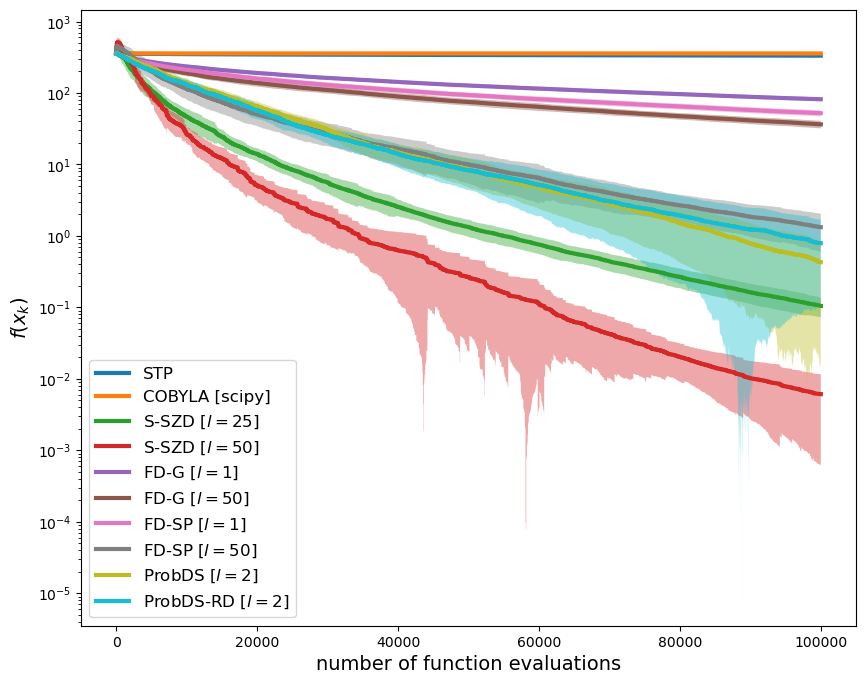

In [5]:
results = read_results(fpaths)
fig, ax = plt.subplots(figsize=(10, 8))
for (k, (mu, std)) in results.items():
    lcb = abs(mu - std)  
    ax.plot(range(mu.shape[0]), mu, '-', label=k, lw=3)
    ax.fill_between(range(mu.shape[0]), lcb, mu + std, alpha=0.4)
ax.set_yscale('log')
ax.set_xlabel("number of function evaluations", fontsize=14)
ax.set_ylabel("$f(x_k)$", fontsize=14)
ax.legend(fontsize=12)
fig.savefig("./img/strong_conv_comparison.pdf", bbox_inches='tight')

 ## Comparison on PL Convex

In [12]:
in_path = "../paper_experiments/synthetic_comparison/plconv/50/"

fpaths = [
    (f"{in_path}/stp.log", "STP"),
    (f"{in_path}/cobyla.log", "COBYLA [scipy]"),
#    (f"{in_path}/sszd_co_25.log", "S-SZD-CO [$l = 25$]"),
#    (f"{in_path}/sszd_co_50.log", "S-SZD-CO [$l = 50$]"),
    (f"{in_path}/sszd_qr_25.log", "S-SZD [$l = 25$]"),
    (f"{in_path}/sszd_qr_50.log", "S-SZD [$l = 50$]"),
 #   (f"{in_path}/nesterov.log", "FD-G [$l = 1$]"),
 #   (f"{in_path}/duchi.log", "FD-G [$l = 50$]"),
 #   (f"{in_path}/flaxman.log", "FD-SP [$l = 1$]"),
 #   (f"{in_path}/beharas.log", "FD-SP [$l = 50$]"),
    (f"{in_path}/probds_sp_2.log", "ProbDS [$l = 2$]"),
    (f"{in_path}/probds_sketch_ortho_sp_25_2.log", "ProbDS-RD [$l = 2$]"),
    #(f"{in_path}/probds_sketch_orthogonal_sp_2_25.log", "ProbDS-RD [$l = 25$]"),
]

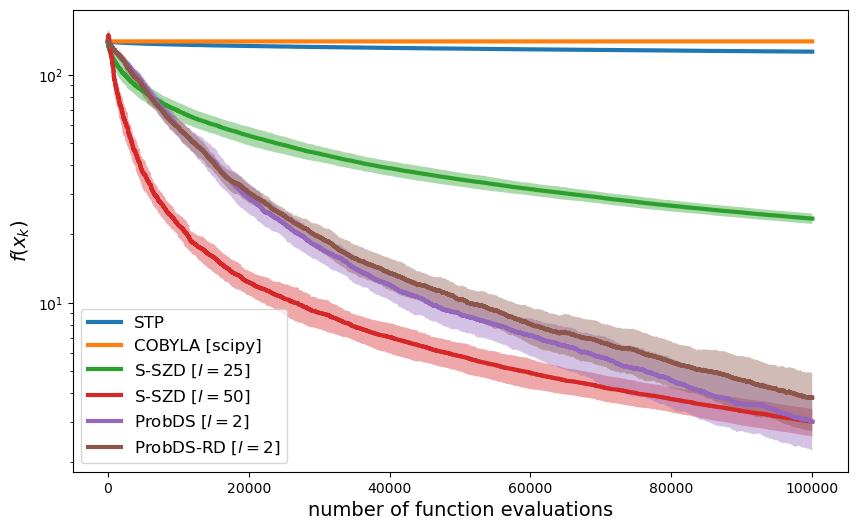

In [13]:
results = read_results(fpaths)
fig, ax = plt.subplots(figsize=(10, 6))
for (k, (mu, std)) in results.items():
    lcb = abs(mu - std)  
    ax.plot(range(mu.shape[0]), mu, '-', label=k, lw=3)
    ax.fill_between(range(mu.shape[0]), lcb, mu + std, alpha=0.4)
ax.set_yscale('log')
ax.set_xlabel("number of function evaluations", fontsize=14)
ax.set_ylabel("$f(x_k)$", fontsize=14)
ax.legend(fontsize=12)
fig.savefig("./img/plconv_comparison.pdf", bbox_inches='tight')

## Comparison on PL Non-convex

In [28]:
in_path = "../paper_experiments/synthetic_comparison/plnonconv/50/"

fpaths = [
    (f"{in_path}/stp.log", "STP"),
#    (f"{in_path}/cobyla.log", "COBYLA [scipy]"),
#    (f"{in_path}/sszd_co_25.log", "S-SZD-CO [$l = 25$]"),
#    (f"{in_path}/sszd_co_50.log", "S-SZD-CO [$l = 50$]"),
    (f"{in_path}/sszd_qr_25.log", "S-SZD [$l = 25$]"),
    (f"{in_path}/sszd_qr_50.log", "S-SZD [$l = 50$]"),
 #   (f"{in_path}/nesterov.log", "FD-G [$l = 1$]"),
 #   (f"{in_path}/duchi.log", "FD-G [$l = 50$]"),
 #   (f"{in_path}/flaxman.log", "FD-SP [$l = 1$]"),
 #   (f"{in_path}/beharas.log", "FD-SP [$l = 50$]"),
    (f"{in_path}/probds_sp_2.log", "ProbDS [$l = 2$]"),
    (f"{in_path}/probds_sketch_ortho_sp_25_2.log", "ProbDS-RD [$l = 2$]"),
    #(f"{in_path}/probds_sketch_orthogonal_sp_2_25.log", "ProbDS-RD [$l = 25$]"),
]

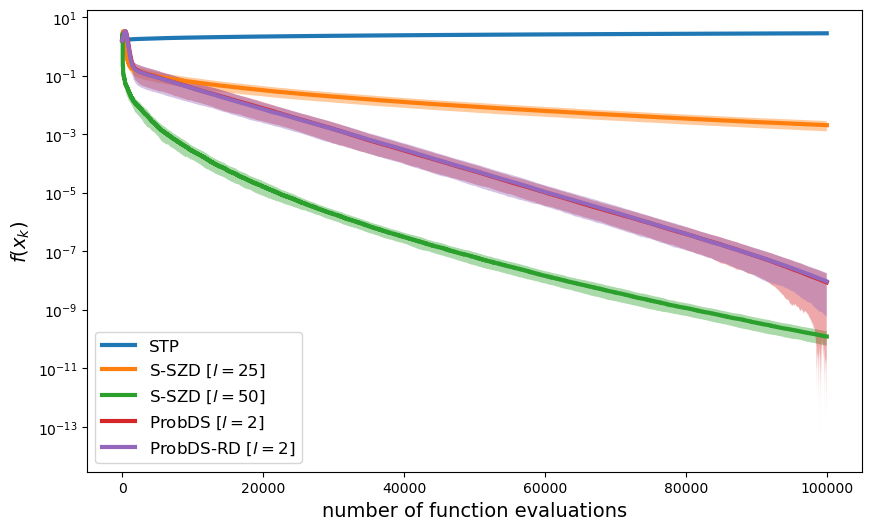

In [29]:
results = read_results(fpaths)
fig, ax = plt.subplots(figsize=(10, 6))
for (k, (mu, std)) in results.items():
    lcb = abs(mu - std)  
    ax.plot(range(mu.shape[0]), mu, '-', label=k, lw=3)
    ax.fill_between(range(mu.shape[0]), lcb, mu + std, alpha=0.4)
ax.set_yscale('log')
ax.set_xlabel("number of function evaluations", fontsize=14)
ax.set_ylabel("$f(x_k)$", fontsize=14)
ax.legend(fontsize=12)
fig.savefig("./img/plnonconv_comparison.pdf", bbox_inches='tight')

# Comparison with ZO-SVRG 

In [98]:
in_path = "../paper_experiments/synthetic_comparison/sconv/50/"

fpaths = [
    (f"{in_path}/sszd_qr_50.log", "S-SZD [$l = 50$]"),
    (f"{in_path}/zo_svrg_coo_50.log", "ZO-SVRG-Coord"),
    (f"{in_path}/zo_svrg_coo_rand_50_1.log", "ZO-SVRG-Coord-Rand [$l = 1$]"),
    (f"{in_path}/zo_svrg_coo_rand_50_25.log", "ZO-SVRG-Coord-Rand [$l = 25$]"),
    (f"{in_path}/isszd_qr_50.log", "S-SZD imp. stepsize [$l = 50$]"),
]

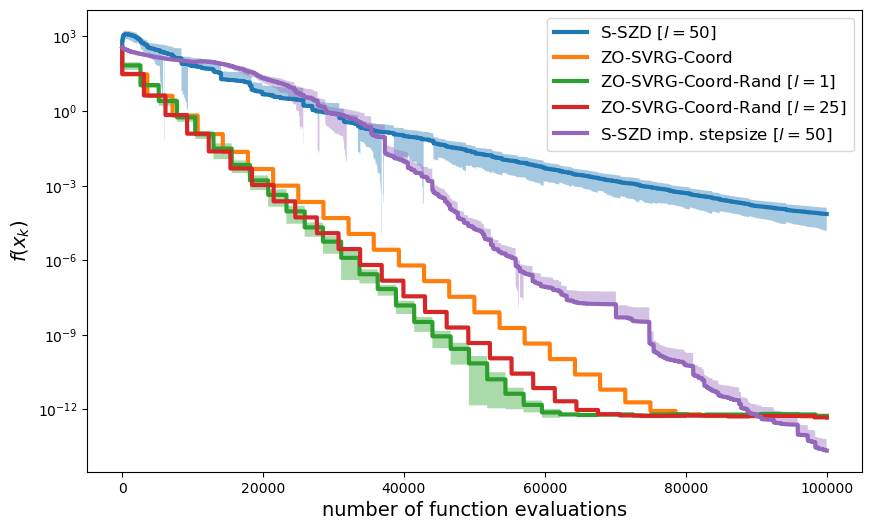

In [99]:
results = read_results(fpaths)
fig, ax = plt.subplots(figsize=(10, 6))
for (k, (mu, std)) in results.items():
    lcb = (mu - std)  
    lcb[lcb < 0.0] = mu[lcb < 0.0] - 1e-20
    ax.plot(range(mu.shape[0]), mu, '-', label=k, lw=3)
    ax.fill_between(range(mu.shape[0]), lcb, mu + std, alpha=0.4)
ax.set_yscale('log')
ax.set_xlabel("number of function evaluations", fontsize=14)
ax.set_ylabel("$f(x_k)$", fontsize=14)
ax.legend(fontsize=12)
fig.savefig("./img/svrg_sconv_comparison.pdf", bbox_inches='tight')

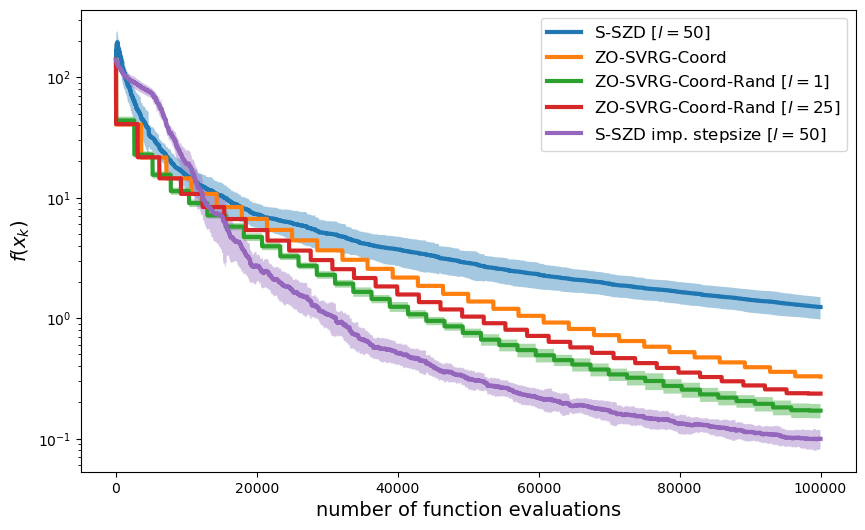

In [107]:
in_path = "../paper_experiments/synthetic_comparison/plconv/50/"

fpaths = [
    (f"{in_path}/sszd_qr_50.log", "S-SZD [$l = 50$]"),
    (f"{in_path}/zo_svrg_coo_50.log", "ZO-SVRG-Coord"),
    (f"{in_path}/zo_svrg_coo_rand_50_1.log", "ZO-SVRG-Coord-Rand [$l = 1$]"),
    (f"{in_path}/zo_svrg_coo_rand_50_25.log", "ZO-SVRG-Coord-Rand [$l = 25$]"),
    (f"{in_path}/isszd_qr_50.log", "S-SZD imp. stepsize [$l = 50$]"),
]
results = read_results(fpaths)
fig, ax = plt.subplots(figsize=(10, 6))
for (k, (mu, std)) in results.items():
    lcb = (mu - std)  
    lcb[lcb < 0.0] = mu[lcb < 0.0] - 1e-20
    ax.plot(range(mu.shape[0]), mu, '-', label=k, lw=3)
    ax.fill_between(range(mu.shape[0]), lcb, mu + std, alpha=0.4)
ax.set_yscale('log')
ax.set_xlabel("number of function evaluations", fontsize=14)
ax.set_ylabel("$f(x_k)$", fontsize=14)
ax.legend(fontsize=12)
fig.savefig("./img/svrg_plconv_comparison.pdf", bbox_inches='tight')

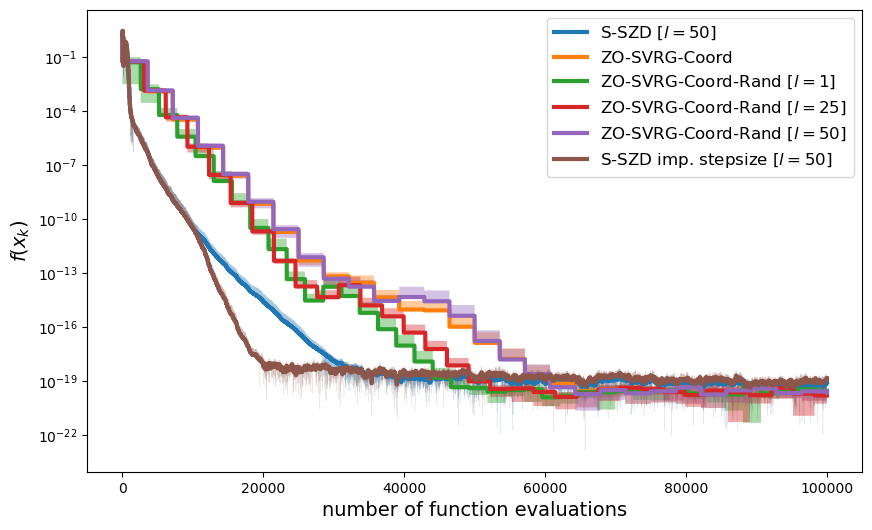

In [122]:
in_path = "../paper_experiments/synthetic_comparison/plnonconv/50/"

fpaths = [
    (f"{in_path}/sszd_qr_50.log", "S-SZD [$l = 50$]"),
    (f"{in_path}/zo_svrg_coo_50.log", "ZO-SVRG-Coord"),
    (f"{in_path}/zo_svrg_coo_rand_50_1.log", "ZO-SVRG-Coord-Rand [$l = 1$]"),
    (f"{in_path}/zo_svrg_coo_rand_50_25.log", "ZO-SVRG-Coord-Rand [$l = 25$]"),
    (f"{in_path}/zo_svrg_coo_rand_50_50.log", "ZO-SVRG-Coord-Rand [$l = 50$]"),
    (f"{in_path}/isszd_qr_50.log", "S-SZD imp. stepsize [$l = 50$]"),
]
results = read_results(fpaths)
fig, ax = plt.subplots(figsize=(10, 6))
for (k, (mu, std)) in results.items():
    lcb = (mu - std)  
    lcb[lcb < 0.0] = mu[lcb < 0.0] - 1e-20
    ax.plot(range(mu.shape[0]), mu, '-', label=k, lw=3)
    ax.fill_between(range(mu.shape[0]), lcb, mu + std, alpha=0.4)
ax.set_yscale('log')
ax.set_xlabel("number of function evaluations", fontsize=14)
ax.set_ylabel("$f(x_k)$", fontsize=14)
ax.legend(fontsize=12)
fig.savefig("./img/svrg_plnonconv_comparison.pdf", bbox_inches='tight')